In [120]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
from numpy.random import rand,seed
from numpy.linalg import norm

In [279]:
seed(314)

iterations=1001

m=10
n=20
A=rand(m,n)
b=A.dot(rand(n,1))
# b=np.squeeze(b)
g = lambda x: A.dot(x)+b
# gamma = lambda n: 1/np.sqrt(n)
lamb0 = np.ones([m,1])

In [280]:
def objective_function(x):
    return np.sum(-np.sqrt(x),1)

In [304]:
def dual_projected_subgradient(lamb,iterations):
    x = []
#     x_real = []
    gamma = []
    for k in range(1,iterations+1):
        
        x_k = np.power((2*lamb.T.dot(A)),-2).T
        x.append(x_k)
        
        gamma.append(1/np.sqrt(k))
        
        
#         x_real.append(full_averaging_sequance(x,mu))
        
        g_xk = g(x_k)
        #add positivity to lambda
        lamb = lamb + g_xk/(norm(g_xk,2)*gamma[k-1])
        lamb[lamb < 0] = 0
    
    x = np.squeeze(np.array(x))
    
    gamma = np.squeeze(np.array(gamma))
    
    mu = full_averaging_mu(x,gamma)

    x_real = full_averaging_sequance(x,mu)

    return objective_function(x_real)
#     return x_real

In [307]:
def partial_averaging_sequance(x,mu): 
    return x[int(len(x)/2):].dot(mu[int(len(x)/2):])

# def full_averaging_sequance(x,mu):
#     x = np.squeeze(np.array(x))
#     return x.T.dot(mu)


def full_averaging_sequance(x,mu):
    x_avg = []
    for k in range(1,1+len(x)):
        x_avg.append(x[:k].T.dot(mu[:k]))
        if k%100==1:
            print(f'iteration {k}:')
            print('checking violations:')
            print(f'Ax<b: {sum(sum(A.dot(x_avg[k-1]).T<b))}')
            print(f'x>=0: {sum(sum(0<=x))}')
        
    return np.squeeze(np.array(x_avg))

def full_averaging_mu(x,gamma):
    mu = []
    denominator_sum = 0
    for j in range(len(x)):
        denominator_sum = denominator_sum + gamma[j]/norm(g(x[j]),2)
    
    for n in range(len(x)):
        mu.append((gamma[n]/norm(g(x[n]),2))/denominator_sum)
    
    return mu
    
def partial_averaging_mu(x,gamma):
    (gamma_n/np.norm(g(x_n),2))/np.sum(gamma_j/np.norm(g(x_n),2))

In [308]:
x = dual_projected_subgradient(lamb0,iterations)

iteration 1:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 101:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 201:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 301:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 401:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 501:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 601:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 701:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 801:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 901:
checking violations:
Ax<b: 100
x>=0: 20020
iteration 1001:
checking violations:
Ax<b: 100
x>=0: 20020


In [294]:
print(x.shape)

(1001,)


In [232]:
A.dot(x[101]).shape
b.shape
# A.dot(x[101])<b

(10,)

In [100]:
xa = np.squeeze(np.array(x))
gammaa = np.squeeze(np.array(gamma))

In [180]:
len(x)
# gammaa[-1]

1001

show information regarding the objective function and the
constraint violation on iterations 1,101,201,...,1001). What is the obtained output?

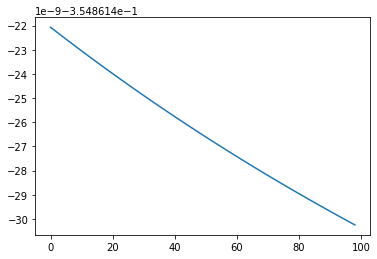

In [202]:
fig,ax = plt.subplots(1,1)
ax.plot(x[-100:-1]);

In [130]:
obj_x = np.sum(-np.sqrt(x),1)

In [131]:
obj_x.shape

(1001,)

In [150]:
x[:,:5].T.dot(mu).shape

(5,)

In [206]:
x.shape

(1001,)

In [205]:
1==0

False

In [ ]:
x.s